In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt


In [46]:
cwur=pd.read_csv('cwurData.csv')
cwur1=cwur.copy()

In [4]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [6]:
null_counts = cwur.isnull().sum()

# Print the result
print(null_counts)

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64


In [8]:
cwur.shape

(2200, 14)

In [42]:
i_c=cwur[['institution'	,'country']]
i_c=i_c.head(20)

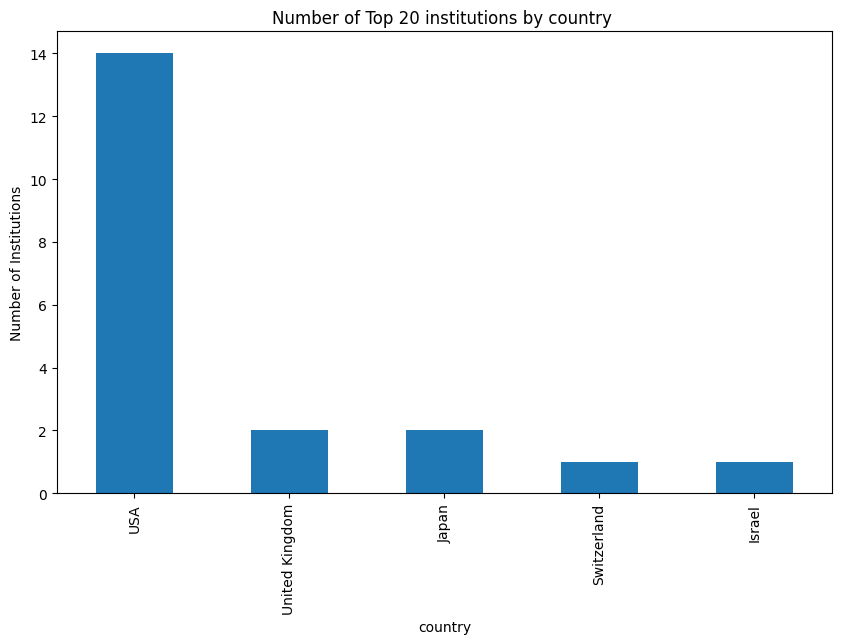

In [61]:
country_counts = i_c['country'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Number of Institutions')
plt.title('Number of Top 20 institutions by country ')
plt.xticks(rotation=45)
country_counts.plot(kind='bar')
plt.show()


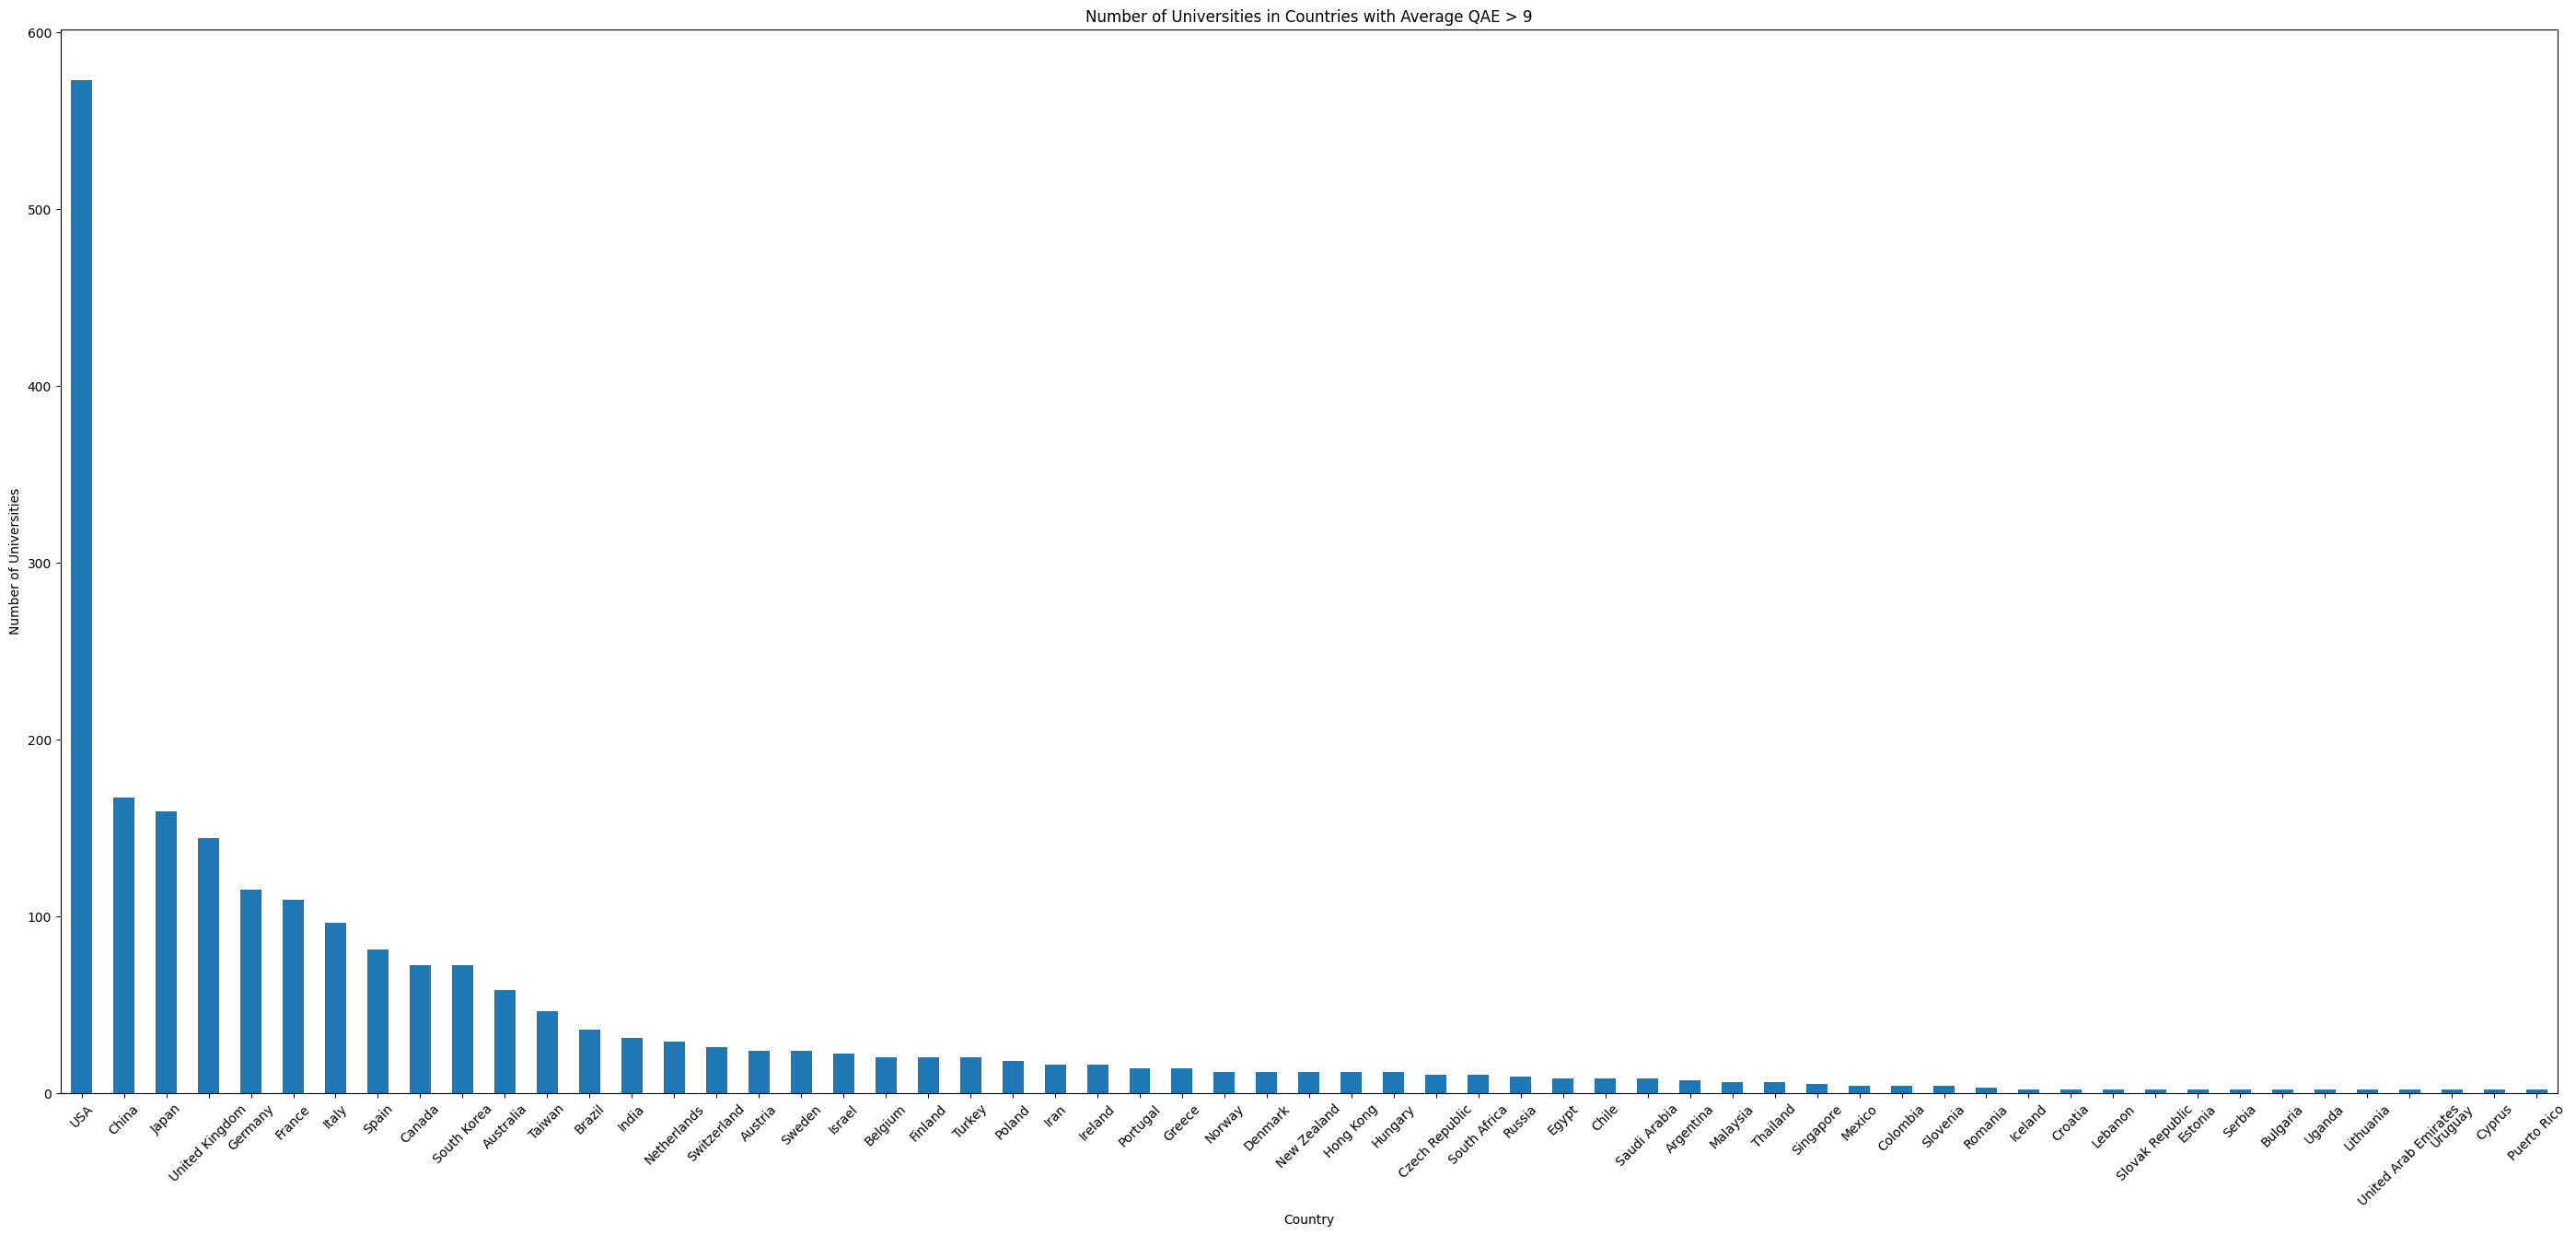

In [60]:
qoe=cwur1[['country','quality_of_education']]
average_qae_by_country = qoe.groupby('country')['quality_of_education'].mean()
countries_with_high_qae = average_qae_by_country[average_qae_by_country > 9].index


# Filter countries with an average QAE greater than 9
filtered_df = cwur1[cwur1['country'].isin(countries_with_high_qae)]

# Count the number of universities in each of these countries
country_counts = filtered_df['country'].value_counts()

# Create a histogram
plt.figure(figsize=(35, 15))
country_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.title('Number of Universities in Countries with Average QAE > 9')
plt.xticks(rotation=45)
plt.show()

In [63]:
top_10=cwur['institution'].head(10)
top_10

0                       Harvard University
1    Massachusetts Institute of Technology
2                      Stanford University
3                  University of Cambridge
4       California Institute of Technology
5                     Princeton University
6                     University of Oxford
7                          Yale University
8                      Columbia University
9       University of California, Berkeley
Name: institution, dtype: object

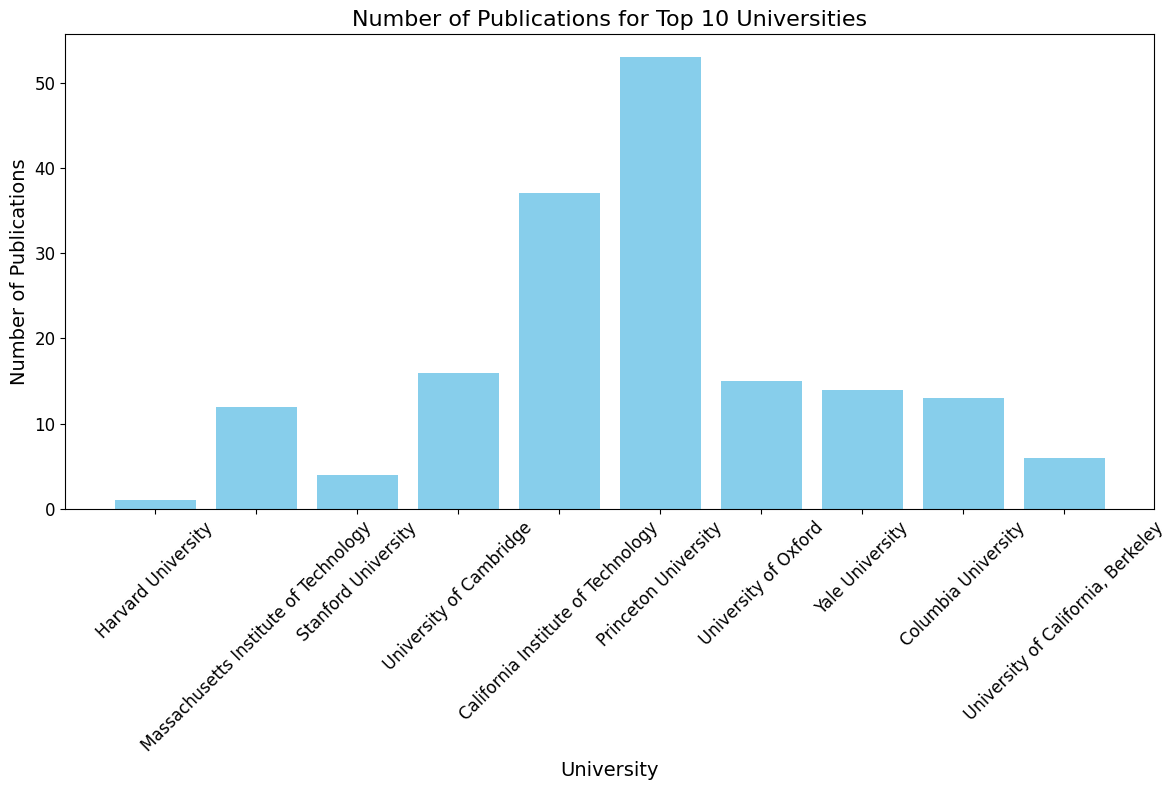

In [76]:
top_10 = cwur1['institution'].head(10)  # List of top 10 universities
publications = cwur1['publications'].head(10)  # Corresponding number of publications


# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10, publications, color='skyblue')

# Set labels and title
plt.xlabel('University', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.title('Number of Publications for Top 10 Universities', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout to fit labels
plt.show()